# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [9]:
df = pd.read_csv(r"C:\Users\55179\Downloads\MODULO7_PROJETOFINAL_BASE_SUPERMERCADO - MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv", delimiter=',')

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [83]:
#Seu código aqui para a média
media_valor_categoria = df.groupby('Categoria')['Preco_Normal'].mean().sort_values(ascending=False)

print(media_valor_categoria)

Categoria
comidas-preparadas            3095.043478
lacteos                       2385.219239
congelados                    2108.042553
belleza-y-cuidado-personal    1783.556485
frutas                        1724.473684
verduras                      1343.296875
instantaneos-y-sopas           765.491228
Name: Preco_Normal, dtype: float64


In [84]:
#Seu código aqui para a mediana
mediana_valor_categoria = df.groupby('Categoria')['Preco_Normal'].median().sort_values(ascending=False)
print(mediana_valor_categoria,"\n")

comparacao_media_mediana = pd.DataFrame({
    'Média': media_valor_categoria,
    'Mediana': mediana_valor_categoria
})


comparacao_media_mediana['Diferença'] = comparacao_media_mediana['Média'] - comparacao_media_mediana['Mediana']

maior_que_mediana = comparacao_media_mediana[comparacao_media_mediana['Diferença'] > 0].sort_values(by='Diferença', ascending=False)


menor_que_mediana = comparacao_media_mediana[comparacao_media_mediana['Diferença'] < 0].sort_values(by='Diferença', ascending=True)


print("Categorias onde a média é maior que a mediana:")
print(maior_que_mediana,"\n")

print("\nCategorias onde a média é menor que a mediana:")
print(menor_que_mediana,"\n")

Categoria
comidas-preparadas            3290.0
belleza-y-cuidado-personal    1569.0
congelados                    1519.0
frutas                        1195.0
verduras                      1180.0
lacteos                        989.0
instantaneos-y-sopas           439.0
Name: Preco_Normal, dtype: float64 

Categorias onde a média é maior que a mediana:
                                  Média  Mediana    Diferença
Categoria                                                    
lacteos                     2385.219239    989.0  1396.219239
congelados                  2108.042553   1519.0   589.042553
frutas                      1724.473684   1195.0   529.473684
instantaneos-y-sopas         765.491228    439.0   326.491228
belleza-y-cuidado-personal  1783.556485   1569.0   214.556485
verduras                    1343.296875   1180.0   163.296875 


Categorias onde a média é menor que a mediana:
                          Média  Mediana   Diferença
Categoria                                       

As categorias que apresentam as maiores diferenças entre media e media são lacteos, congelados e frutas

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [85]:
#Seu código aqui
desvio_valor_categoria = df.groupby('Categoria')['Preco_Normal'].std()
desvio_valor_categoria = df.groupby('Categoria')['Preco_Normal'].std().sort_values(ascending=False)
print(desvio_valor_categoria)




Categoria
lacteos                       3925.816164
belleza-y-cuidado-personal    2210.041719
congelados                    2111.539896
comidas-preparadas            2019.911428
frutas                        1639.151114
instantaneos-y-sopas          1170.232869
verduras                      1012.699625
Name: Preco_Normal, dtype: float64


Digite nesse campo o comportamento que você identificou.

Primeiramente, podemos observar que há um desvio padrão muito grande, o que indica que os valores dentro da categoria são bastante dispersos. Além disso, nas categorias onde o desvio padrão é muito alto e a média é significativamente maior, pode indicar que há itens com valores muito elevados, resultando em uma Distribuição Assimétrica Positiva. O oposto pode ser observado nas categorias que madiana é significativamente maior.


# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

0       19788
1       18228
2       18228
3       18228
4       17988
        ...  
1017        0
1018        0
1027        0
1028        0
1106        0
Name: Preco_Normal, Length: 447, dtype: int64


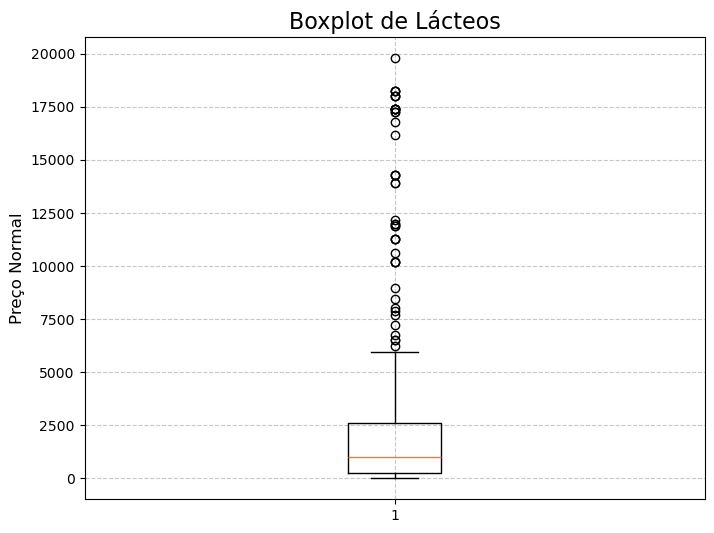

In [57]:
dados_lacteos = df.loc[df['Categoria'] == 'lacteos', 'Preco_Normal']

dados_lacteos = pd.to_numeric(dados_lacteos, errors='coerce')


plt.figure(figsize=(8, 6))
plt.boxplot(dados_lacteos)


plt.title('Boxplot de Lácteos', fontsize=16)
plt.ylabel('Preço Normal', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Exibindo o gráfico
plt.show()

A maioria dos dados está concentrada em preços abaixo de 2.500, com a mediana localizada ligeiramente abaixo de 1.000. Isso indica que a maior parte dos preços está em uma faixa mais baixa. O gráfico apresenta muitos outliers. Existem muitos pontos acima do whisker superior, indicando produtos com preços significativamente mais altos que o padrão. Esses outliers sugerem que há uma ampla variação dentro da categoria. A distribuição parece ser assimétrica positiva, com uma cauda longa. Isso reforça que, enquanto a maioria dos preços está em uma faixa razoável, existem produtos que destoam significativamente. Há a presença de varios outliers e parte deles esta muito longe do whisker superior. 

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

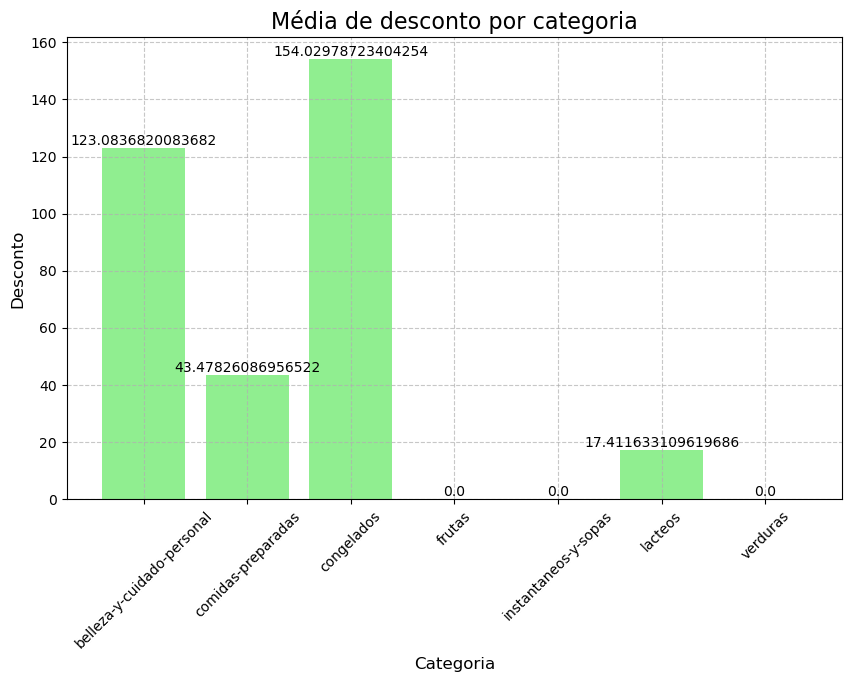

In [10]:
plt.figure(figsize=(10, 6))
desconto_barra = df.groupby('Categoria')['Desconto'].mean()
plt.bar(range(len(desconto_barra)), desconto_barra, color='lightgreen')

for i, valor in enumerate(desconto_barra):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=10)

plt.title('Média de desconto por categoria', fontsize=16)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Desconto', fontsize=12)
plt.xticks(range(len(desconto_barra)), desconto_barra.index, rotation=45) 
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

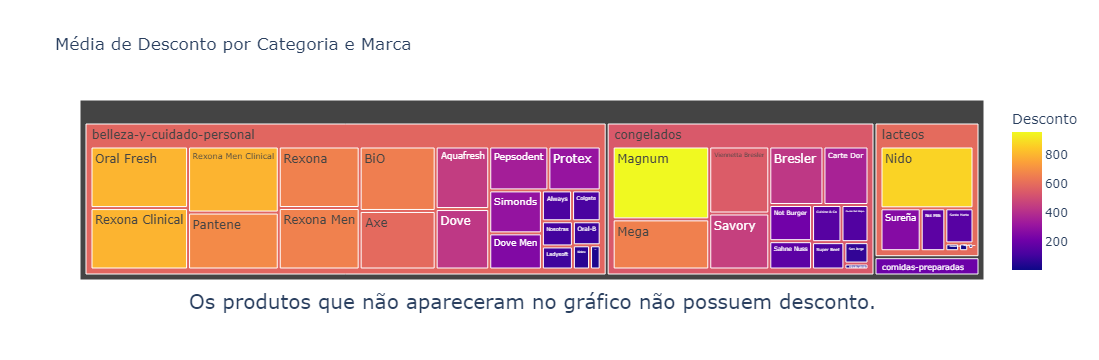

In [37]:
# Agrupando os dados por Categoria e Marca, e calculando a média de Desconto
teste = df.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index()
teste['Desconto'] = teste['Desconto'].fillna(0)
teste = teste[teste['Desconto'] > 0]



# Criando o gráfico de treemap com os descontos por Categoria e Marca
fig = px.treemap(teste,
                 path=['Categoria', 'Marca'],
                 values='Desconto',
                 title='Média de Desconto por Categoria e Marca',
                 color='Desconto')

# Atualizando o layout para incluir um subtítulo ou anotação
fig.update_layout(
    annotations=[
        dict(
            text='Os produtos que não apareceram no gráfico não possuem desconto.',
            x=0.5,  # Centralizado
            y=-0.2,  # Posição abaixo do gráfico
            xref='paper',
            yref='paper',
            showarrow=False,
            font=dict(size=20)
        )
    ]
)
# Exibindo o gráfico
fig.show()